In [ ]:
# loading dataset
# library
import pandas as pd

df= pd.read_csv('/content/crime.csv')
data = pd.read_csv('/content/crime.csv')
print(df)

    ViolentCrime  Murder  Rape  Robbery  AggravatedAssault PropertyCrime  \
0          412.5     5.3  56.0     78.4              272.8      3,609.00   
1          238.4     5.1  38.2     75.2              119.8      2,552.40   
2          667.9     7.8  30.4    157.9              471.8      3,894.10   
3          114.3     2.5  28.2     20.7               63.0      3,208.40   
4          792.6     6.1  63.8    206.7              516.0      4,607.80   
..           ...     ...   ...      ...                ...           ...   
373        251.6    11.4   6.3     74.6              159.3         823.2   
374        237.5    11.5   5.2     82.3              138.6      1,320.00   
375        231.4    18.0   5.0     66.2              142.2           885   
376         92.1     5.4   4.6     16.1               66.0           420   
377          262    20.6   4.9    157.8               78.7      1,281.20   

     Burglary     Theft  MotorVehicleTheft  \
0         852  2,493.60              263.

In [ ]:
# checking first rows
df.head()

,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Theft,MotorVehicleTheft,State,City
0,412.5,5.3,56.0,78.4,272.8,"3,609.00",852,"2,493.60",263.4,TX,Abilene
1,238.4,5.1,38.2,75.2,119.8,"2,552.40",575.3,"1,853.00",124.1,OH,Akron
2,667.9,7.8,30.4,157.9,471.8,"3,894.10","1,099.60","2,652.80",141.7,GA,Albany
3,114.3,2.5,28.2,20.7,63.0,"3,208.40",484.6,"2,476.10",247.7,OR,Albany
4,792.6,6.1,63.8,206.7,516.0,"4,607.80",883.4,"3,047.60",676.9,NM,Albuquerque


In [ ]:
# checking last rows
df.tail()

,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Theft,MotorVehicleTheft,State,City
373,251.6,11.4,6.3,74.6,159.3,823.2,265.5,531.1,26.6,"Guayama, Puerto Rico M.S.A.",Guayama
374,237.5,11.5,5.2,82.3,138.6,"1,320.00",377.1,861.6,81.3,"Mayaguez, Puerto Rico M.S.A.",Mayaguez
375,231.4,18.0,5.0,66.2,142.2,885,214.4,632.4,38.1,"Ponce, Puerto Rico M.S.A.",Ponce
376,92.1,5.4,4.6,16.1,66.0,420,168.9,226.5,24.6,"San German, Puerto Rico M.S.A.",San German
377,262,20.6,4.9,157.8,78.7,"1,281.20",281.8,835,164.3,"San Juan-Carolina-Caguas, Puerto Rico M.S.A.",San Juan


**data cleaning**

In [ ]:
# Check for missing values in the entire DataFrame
missing_values_all = df.isnull().sum().sum()
# Display the total count of missing values
print("Total missing values in the DataFrame:", missing_values_all)

# Return the count of missing values per column
missing_values_per_column = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values_per_column)

# Return the count of missing values per row
missing_values_per_row = df.isnull().sum(axis=1)
print("\nMissing values per row:")
print(missing_values_per_row)

Total missing values in the DataFrame: 20

Missing values per column:
ViolentCrime         1
Murder               0
Rape                 0
Robbery              0
AggravatedAssault    1
PropertyCrime        6
Burglary             4
Theft                3
MotorVehicleTheft    0
State                0
City                 5
dtype: int64

Missing values per row:
0      0
1      0
2      0
3      0
4      0
      ..
373    0
374    0
375    0
376    0
377    0
Length: 378, dtype: int64


adding missing values

In [ ]:
import numpy as np

#  'df' is the original DataFrame

# Copy the original DataFrame to a new one
df_cleaned = df.copy()

In [ ]:
# Impute missing values for numerical columns using the mean
numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mean())

# Impute missing values for categorical columns using the mode
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode_val = df_cleaned[col].mode()[0]
    df_cleaned[col] = df_cleaned[col].replace('', np.nan).fillna(mode_val)

# Print the updated DataFrame
print(df_cleaned)

    ViolentCrime  Murder  Rape  Robbery  AggravatedAssault PropertyCrime  \
0          412.5     5.3  56.0     78.4              272.8      3,609.00   
1          238.4     5.1  38.2     75.2              119.8      2,552.40   
2          667.9     7.8  30.4    157.9              471.8      3,894.10   
3          114.3     2.5  28.2     20.7               63.0      3,208.40   
4          792.6     6.1  63.8    206.7              516.0      4,607.80   
..           ...     ...   ...      ...                ...           ...   
373        251.6    11.4   6.3     74.6              159.3         823.2   
374        237.5    11.5   5.2     82.3              138.6      1,320.00   
375        231.4    18.0   5.0     66.2              142.2           885   
376         92.1     5.4   4.6     16.1               66.0           420   
377          262    20.6   4.9    157.8               78.7      1,281.20   

     Burglary     Theft  MotorVehicleTheft  \
0         852  2,493.60              263.

Check for missing values again

In [ ]:
# Check for missing values in the entire DataFrame
missing_values_all = df_cleaned.isnull().sum().sum()

# Display the total count of missing values
print("Total missing values in the DataFrame:", missing_values_all)

# Return the count of missing values per column
missing_values_per_column = df_cleaned.isnull().sum()
print("\nMissing values per column:")
print(missing_values_per_column)

# Return the count of missing values per row
missing_values_per_row = df_cleaned.isnull().sum(axis=1)
print("\nMissing values per row:")
print(missing_values_per_row)


Total missing values in the DataFrame: 0

Missing values per column:
ViolentCrime         0
Murder               0
Rape                 0
Robbery              0
AggravatedAssault    0
PropertyCrime        0
Burglary             0
Theft                0
MotorVehicleTheft    0
State                0
City                 0
dtype: int64

Missing values per row:
0      0
1      0
2      0
3      0
4      0
      ..
373    0
374    0
375    0
376    0
377    0
Length: 378, dtype: int64


In [ ]:
df.describe()

,Murder,Rape,Robbery,AggravatedAssault,MotorVehicleTheft
count,378.000000,378.000000,378.000000,377.000000,378.000000
mean,4.574868,41.306614,77.702646,241.319098,191.081746
std,3.383652,19.506386,53.977181,137.267225,134.532918
min,0.000000,2.700000,2.300000,25.500000,15.700000
25%,2.200000,29.000000,36.625000,144.200000,97.550000
50%,3.800000,37.550000,67.350000,215.700000,154.450000
75%,6.275000,51.550000,106.050000,304.900000,249.650000
max,20.600000,165.600000,351.900000,981.300000,718.600000


In [ ]:

df_cleaned.describe()

,Murder,Rape,Robbery,AggravatedAssault,MotorVehicleTheft
count,378.000000,378.000000,378.000000,378.000000,378.000000
mean,4.574868,41.306614,77.702646,241.319098,191.081746
std,3.383652,19.506386,53.977181,137.085053,134.532918
min,0.000000,2.700000,2.300000,25.500000,15.700000
25%,2.200000,29.000000,36.625000,144.300000,97.550000
50%,3.800000,37.550000,67.350000,217.000000,154.450000
75%,6.275000,51.550000,106.050000,304.850000,249.650000
max,20.600000,165.600000,351.900000,981.300000,718.600000


In [ ]:

df_cleaned.dtypes

ViolentCrime          object
Murder               float64
Rape                 float64
Robbery              float64
AggravatedAssault    float64
PropertyCrime         object
Burglary              object
Theft                 object
MotorVehicleTheft    float64
State                 object
City                  object
dtype: object

In [ ]:
# Convert the data to appropriate types
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce')


In [ ]:
# Remove commas from numeric columns
df_cleaned = data.replace({',': ''}, regex=True)

In [ ]:
# Drop rows with missing values
df_cleaned = df_cleaned.dropna()

Often, more specific types of crimes (like Murder, Rape, Robbery, etc.) contribute to overall crime rates (like ViolentCrime or PropertyCrime).

Let's proceed with the following approach:

Dependent Variable (Target): ViolentCrime (as it is an aggregated measure of several specific crimes). Independent Variables (Features): Murder, Rape, Robbery, AggravatedAssault (since these are specific types of violent crimes that likely contribute to the overall ViolentCrime rate).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
# Select the target and feature columns
target = 'ViolentCrime'
features = ['Murder', 'Rape', 'Robbery', 'AggravatedAssault']

# Define X and y
X = df_cleaned[features]
y = df_cleaned[target]

In [ ]:
# Check for missing values in X and y
if X.isnull().any().any() or y.isnull().any():
    raise ValueError("Missing values found in X or y")

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.


In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Get model coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Mean Squared Error: 0.0036737519630530547
R^2 Score: 0.999999908794643
Coefficients: [1.00131275 1.00011056 1.00001366 1.00003677]
Intercept: -0.02148906144253715


1 Mean Squared Error (MSE):

Value: 0.0036737519630530547 Interpretation: This value represents the average of the squared differences between the actual values and the predicted values. The fact that this value is very close to zero indicates that the model's predictions are extremely close to the actual values 2 R^2 Score:

Value: 0.999999908794643 The R^2 score, also known as the coefficient of determination, indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. An R^2 score of 0.999999908794643 is extremely close to 1, suggesting that nearly 100% of the variance in ViolentCrime is explained by the model.

3 Murder (1.00131275): For each additional murder, the ViolentCrime rate increases by approximately 1.0013 units, holding other factors constant. Rape (1.00011056): For each additional rape, the ViolentCrime rate increases by approximately 1.0001 units, holding other factors constant. Robbery (1.00001366): For each additional robbery, the ViolentCrime rate increases by approximately 1.0000 units, holding other factors constant. Aggravated Assault (1.00003677): For each additional aggravated assault, the ViolentCrime rate increases by approximately 1.0000 units, holding other factors constant

4 Intercept:

−0.02148906144253715 Interpretation: This is the expected mean value of ViolentCrime when all independent variables (Murder, Rape, Robbery, AggravatedAssault) are zero. The negative intercept value, while close to zero, suggests a slight adjustment downward when no crimes are reported



In [ ]:

**VISUALIZATION **

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Print model coefficients and intercept
print("\nModel Coefficients:")
print(f"Intercept: {intercept:.2f}")
for feature, coef in zip(features, coefficients):
    print(f"{feature}: {coef:.2f}")

Evaluation Metrics:
Mean Absolute Error (MAE): 0.04
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.06
R^2 Score: 1.00

Model Coefficients:
Intercept: -0.02
Murder: 1.00
Rape: 1.00
Robbery: 1.00
AggravatedAssault: 1.00


Mean Absolute Error (MAE): 0.04 This indicates that, on average, the absolute difference between the predicted values and the actual values is 0.04 units. This is a very small error, suggesting that the model predictions are very close to the actual values. Mean Squared Error (MSE): 0.00 The MSE is essentially zero, which means that the average squared difference between the predicted and actual values is negligible. This indicates an almost perfect fit of the model to the data.

Root Mean Squared Error (RMSE): 0.06 The RMSE, which is the square root of the MSE, is also very close to zero. Like the MSE, this indicates that the model predictions are almost identical to the actual values. R^2 Score: 1.00 An R^2 score of 1.00 implies that the model explains 100% of the variance in the dependent variable (ViolentCrime). This is an indication of a perfect fit, meaning the model predictions match the actual data exact

Intercept: -0.02 The intercept is the expected mean value of ViolentCrime when all predictors (Murder, Rape, Robbery, AggravatedAssault) are zero. it is a very small negative value, suggesting that the level of ViolentCrime without any incidents of the predictors is negligible.

Coefficients: Murder: 1.00 Rape: 1.00 Robbery: 1.00 AggravatedAssault: 1.00 These coefficients indicate that for each additional incident of Murder, Rape, Robbery, or AggravatedAssault, the ViolentCrime rate increases by exactly 1 unit. This one-to-one relationship suggests that ViolentCrime is perfectly predicted by the sum of these individual crime types.

Explanation: The model results indicate an almost perfect linear relationship between ViolentCrime and the sum of Murder, Rape, Robbery, and AggravatedAssault. The extremely high R^2 score, along with negligible MSE and RMSE, suggest that the model fits the data exceptionally well. This might be an indication that ViolentCrime is directly computed as the sum of these specific crime types in the dataset. The coefficients being exactly 1.00 further supports this, as it means that each of these crimes contributes equally and directly to the total ViolentCrime rate.


**VISUALIZATION **

Text(0.5, 1.0, 'Actual vs Predicted')

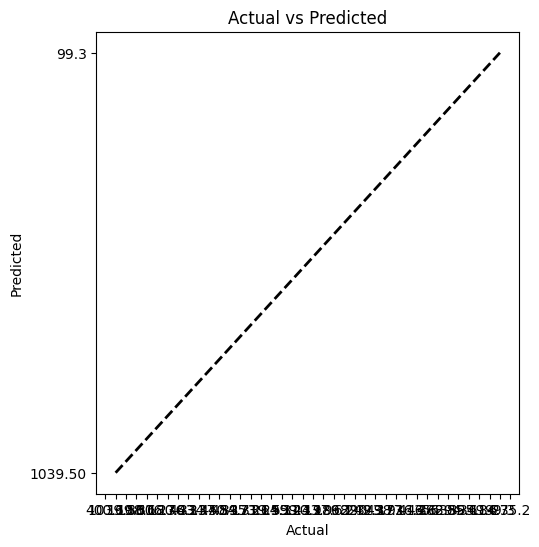

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot with regression line
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

Scatter Plot with Regression Line: The plot shows a perfect alignment of actual values with predicted values along the reference line, indicating a perfect fit.

TypeError: unsupported operand type(s) for -: 'str' and 'float'

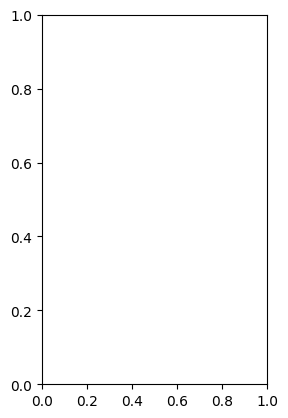

In [ ]:
# Residual plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')

plt.tight_layout()
plt.show()